<a href="https://colab.research.google.com/github/ZiyanHanifGhossan/Text-Analysis-and-Topic-Modeling-of-Rick-and-Morty-Dialogues-Using-NLP-and-Machine-Learning/blob/main/TEXT_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Nama : Ziyan Hanif Ghossan


> NIM  : 1217010086


In [ ]:
import os
import sys
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA MINING/Text Mining, Image Processing, dan CRM./TEXT MINING/RickAndMortyScripts.csv')
df.head()

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


In [ ]:
df.columns

Index(['index', 'season no.', 'episode no.', 'episode name', 'name', 'line'], dtype='object')

In [ ]:
df.shape

(1905, 6)

In [ ]:
sample = df['line'].iloc[0:5]

In [ ]:
sample[1].lower()

'what, rick? what’s going on?'

# Feature Processing

In [ ]:
  from sklearn.feature_extraction.text import CountVectorizer

  cv = CountVectorizer(binary=True)
  cv.fit_transform(sample)

<5x24 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names_out()

array(['about', 'are', 'come', 'for', 'going', 'got', 'gotta', 'hurry',
       'it', 'jus', 'me', 'middle', 'morty', 'night', 'of', 'on', 'rick',
       'surprise', 'talking', 'the', 'up', 'what', 'with', 'you'],
      dtype=object)

Do this first:
- `nltk.download('punkt')`
- `nltk.download('stopwords')`

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
cv = CountVectorizer(binary=True, stop_words=stopwords.words('english'))
cv.fit_transform(sample)

<5x12 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names_out()

array(['come', 'going', 'got', 'gotta', 'hurry', 'jus', 'middle', 'morty',
       'night', 'rick', 'surprise', 'talking'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=0.1, max_df=0.8)
tv.fit_transform(sample)

<5x12 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
tv = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=10, max_df=0.8)
tv.fit_transform(df['line'].dropna())

<1905x230 sparse matrix of type '<class 'numpy.float64'>'
	with 5954 stored elements in Compressed Sparse Row format>

In [ ]:
tv.get_feature_names_out()[:200]

array(['actually', 'ah', 'alright', 'also', 'always', 'anything',
       'around', 'ass', 'aw', 'away', 'back', 'bad', 'believe', 'best',
       'beth', 'better', 'big', 'bit', 'bitch', 'boy', 'bring', 'call',
       'came', 'care', 'citadel', 'come', 'coming', 'could', 'crap',
       'dad', 'damn', 'daughter', 'day', 'dead', 'deer', 'die',
       'different', 'dog', 'dream', 'drunk', 'earth', 'end', 'enough',
       'even', 'ever', 'every', 'everyone', 'everything', 'family',
       'father', 'feel', 'fine', 'first', 'fuck', 'fucking', 'full',
       'fun', 'geez', 'get', 'getting', 'give', 'go', 'god', 'going',
       'gonna', 'good', 'got', 'gotta', 'grandpa', 'great', 'guess',
       'gun', 'guy', 'guys', 'happened', 'hard', 'head', 'heads', 'hear',
       'hell', 'help', 'hey', 'hi', 'high', 'hit', 'hold', 'holy', 'home',
       'hope', 'house', 'huh', 'human', 'ice', 'idea', 'important',
       'jerry', 'jessica', 'job', 'keep', 'kids', 'kill', 'kind', 'know',
       'last', 'lea

In [ ]:
import re
text_clean = df['line'].dropna().apply(lambda x: re.sub(r'\b\d+\b', ' ', x.lower()))
tv = TfidfVectorizer(stop_words=stopwords.words('english'), min_df=10, max_df=0.8)
cv = CountVectorizer(binary=False, stop_words=stopwords.words('english'), min_df=10)

feature = tv.fit_transform(text_clean)
feature_count = cv.fit_transform(text_clean)

In [ ]:
tv.get_feature_names_out()[:200]

array(['actually', 'ah', 'alright', 'also', 'always', 'anything',
       'around', 'ass', 'aw', 'away', 'back', 'bad', 'believe', 'best',
       'beth', 'better', 'big', 'bit', 'bitch', 'boy', 'bring', 'call',
       'came', 'care', 'citadel', 'come', 'coming', 'could', 'crap',
       'dad', 'damn', 'daughter', 'day', 'dead', 'deer', 'die',
       'different', 'dog', 'dream', 'drunk', 'earth', 'end', 'enough',
       'even', 'ever', 'every', 'everyone', 'everything', 'family',
       'father', 'feel', 'fine', 'first', 'fuck', 'fucking', 'full',
       'fun', 'geez', 'get', 'getting', 'give', 'go', 'god', 'going',
       'gonna', 'good', 'got', 'gotta', 'grandpa', 'great', 'guess',
       'gun', 'guy', 'guys', 'happened', 'hard', 'head', 'heads', 'hear',
       'hell', 'help', 'hey', 'hi', 'high', 'hit', 'hold', 'holy', 'home',
       'hope', 'house', 'huh', 'human', 'ice', 'idea', 'important',
       'jerry', 'jessica', 'job', 'keep', 'kids', 'kill', 'kind', 'know',
       'last', 'lea

# KMeans Clustering with TFIDF

In [ ]:
from sklearn.cluster import KMeans
from tqdm import tqdm
inertia = []
for i in tqdm(range(50)):
    km = KMeans(i+1, random_state=100).fit(feature)
    inertia.append(km.inertia_)

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 50/50 [00:19<00:00,  2.51it/s]


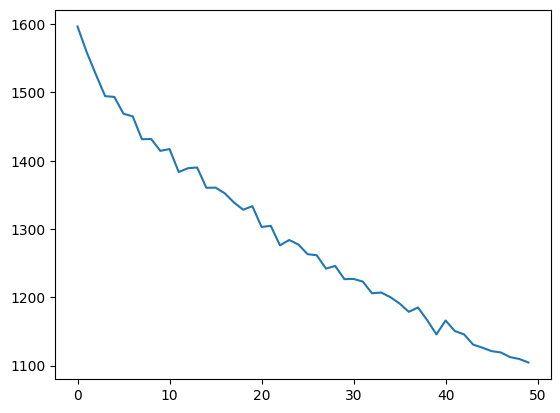

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(inertia)), inertia)

In [ ]:
km = KMeans(50, random_state=100).fit(feature)

In [ ]:
top_words_idx = km.cluster_centers_.argsort()[:, ::-1][:, :10]
terms = tv.get_feature_names_out()
for i in range(top_words_idx.shape[0]):
    print (f"Cluster {i}", end=': ')
    print(', '.join([terms[x] for x in top_words_idx[i, :]]))

Cluster 0: life, math, believe, smith, three, mr, love, man, yeah, help
Cluster 1: time, morty, one, got, alright, guys, schwifty, ass, whole, prison
Cluster 2: mean, well, want, oh, full, jerry, help, gonna, drunk, know
Cluster 3: oh, morty, shit, ooh, sorry, look, crap, dad, problem, son
Cluster 4: would, like, also, see, look, say, life, get, summer, tell
Cluster 5: right, us, jerry, well, got, morty, talking, say, want, see
Cluster 6: yeah, well, rick, much, anything, mean, know, kind, dog, guess
Cluster 7: rick, talking, something, name, grandpa, vindicators, thing, drunk, ricks, ever
Cluster 8: make, two, sure, well, every, know, rick, time, nothing, morty
Cluster 9: whoa, yeah, going, fuck, take, everything, away, morty, like, look
Cluster 10: gonna, morty, back, get, die, whole, take, good, like, go
Cluster 11: morty, right, got, want, see, little, take, even, alright, love
Cluster 12: one, like, morty, give, got, heads, rick, us, every, man
Cluster 13: please, leave, call, fat

# Dimensionality Reduction with SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(100)
feature_svd = svd.fit_transform(feature)

In [ ]:
feature_svd.shape

(1905, 100)

In [ ]:
from sklearn.cluster import KMeans
from tqdm import tqdm
inertia = []
for i in tqdm(range(50)):
    km = KMeans(i+1, random_state=100).fit(feature_svd)
    inertia.append(km.inertia_)

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  2%|▏         | 1/50 [00:00<00:19,  2.57it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  4%|▍         | 2/50 [00:00<00:17,  2.67it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  6%|▌         | 3/50 [00:01<00:25,  1.83it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

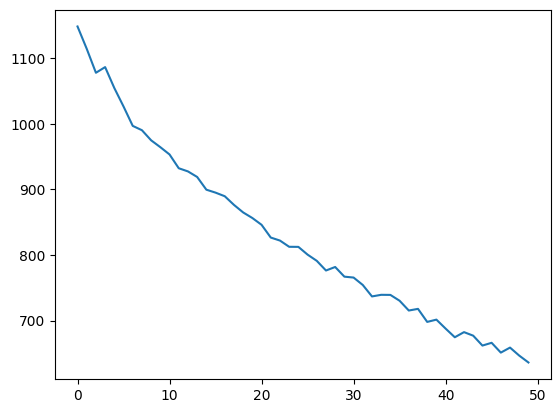

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(inertia)), inertia)

In [ ]:
km = KMeans(50, random_state=100).fit(feature_svd)
km.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(50, 100)

In [ ]:
orig_centroid = svd.inverse_transform(km.cluster_centers_)
top_words_idx = orig_centroid.argsort()[:, ::-1][:, :10]
terms = tv.get_feature_names_out()
for i in range(top_words_idx.shape[0]):
    print (f"Cluster {i}", end=': ')
    print(', '.join([terms[x] for x in top_words_idx[i, :]]))

Cluster 0: gonna, get, go, morty, back, take, die, like, right, put
Cluster 1: time, alright, morty, guys, got, really, know, even, whole, gonna
Cluster 2: like, us, jerry, bitch, hey, wait, uh, something, guess, want
Cluster 3: rick, something, grandpa, away, geez, name, say, could, ever, dad
Cluster 4: need, morty, anything, guys, gonna, help, uh, people, got, hey
Cluster 5: morty, want, like, take, gonna, turn, happened, every, big, uh
Cluster 6: pickle, man, kill, human, job, much, stop, morty, right, kids
Cluster 7: god, oh, head, school, sorry, going, feel, ah, guys, thank
Cluster 8: okay, oh, morty, know, well, second, wow, take, geez, family
Cluster 9: come, get, rick, morty, jerry, oh, home, gotta, got, help
Cluster 10: summer, morty, know, say, right, really, rick, god, please, beth
Cluster 11: fuck, man, oh, get, jerry, turn, thing, mr, damn, ice
Cluster 12: get, morty, jerry, schwifty, could, sorry, thing, whole, back, away
Cluster 13: man, oh, aw, geez, rick, morty, really

# Latent Dirichlet Allocation

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

model = LatentDirichletAllocation(n_components=100)
model.fit_transform(feature_count)

array([[0.00166667, 0.00166667, 0.00166667, ..., 0.00166667, 0.00166667,
        0.00166667],
       [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.00333333,
        0.00333333],
       [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.00333333,
        0.00333333],
       ...,
       [0.00076923, 0.00076923, 0.00076923, ..., 0.00076923, 0.00076923,
        0.00076923],
       [0.00083333, 0.00083333, 0.00083333, ..., 0.00083333, 0.00083333,
        0.00083333],
       [0.00333333, 0.00333333, 0.00333333, ..., 0.00333333, 0.00333333,
        0.00333333]])

In [ ]:
top_words_idx = model.components_.argsort()[:, ::-1][:, :5]
terms = tv.get_feature_names_out()
for i in range(top_words_idx.shape[0]):
    print (f"Cluster {i}", end=': ')
    print(', '.join([terms[x] for x in top_words_idx[i, :]]))

Cluster 0: let, make, three, know, heads
Cluster 1: fun, like, whole, morty, also
Cluster 2: summer, thank, gun, hi, hey
Cluster 3: got, many, morty, whole, life
Cluster 4: deer, hit, head, enough, earth
Cluster 5: leave, bit, yes, guy, high
Cluster 6: earth, prison, planet, every, time
Cluster 7: guess, dead, different, room, mean
Cluster 8: place, wow, thanks, mrs, guy
Cluster 9: hi, um, uh, let, yes
Cluster 10: come, shit, bitch, holy, guy
Cluster 11: something, little, morty, lot, last
Cluster 12: geez, pretty, oh, rick, pickle
Cluster 13: mind, everyone, people, die, family
Cluster 14: ricks, mortys, citadel, nice, problem
Cluster 15: say, ever, day, last, gun
Cluster 16: bad, aw, geez, hey, gun
Cluster 17: school, kids, morty, get, gun
Cluster 18: hold, second, drunk, morty, wait
Cluster 19: alright, morty, go, listen, fine
Cluster 20: coming, actually, talk, like, guy
Cluster 21: kind, morty, universe, uh, guess
Cluster 22: grandpa, full, go, yes, guy
Cluster 23: see, stupid, ye

In [ ]:
from sklearn.datasets import make_multilabel_classification
X, _ = make_multilabel_classification(random_state=0)

In [ ]:
X

array([[3., 1., 4., ..., 4., 1., 3.],
       [5., 0., 6., ..., 0., 0., 3.],
       [3., 4., 1., ..., 3., 2., 5.],
       ...,
       [2., 1., 2., ..., 1., 0., 3.],
       [6., 4., 1., ..., 1., 3., 5.],
       [2., 4., 2., ..., 5., 4., 2.]])